In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.metrics import AUC, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [2]:
# Directory of root folder of dataset (split into Train and Test Folders within that directory)
direct_base = "brain_tumor_dataset" 

In [3]:
classes = ['no','yes']
train_count = 202
test_count = 51

In [4]:
train_dataset_dir = direct_base+"\\train"
test_dataset_dir  = direct_base+"\\test"

In [5]:
# normalize the images as they are read in
# note: you can add other data augmentation functions to the ImageDataGenerator if you want
# Here is a page with what you can add to the ImageDataGenerator: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
train = ImageDataGenerator(rescale = 1/255, horizontal_flip=True)
test = ImageDataGenerator(rescale = 1/255)

In [6]:
# create a stream of images, resized to 256x256, grouped into batches of size 8, and classified into 2 categories
train_dataset = train.flow_from_directory(train_dataset_dir, target_size = (256,256), batch_size=8, class_mode='binary', classes = classes)
test_dataset  = test.flow_from_directory(test_dataset_dir, target_size = (256,256), batch_size=8, class_mode='binary', classes = classes)

Found 202 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


In [7]:
model = Sequential() # create a new sequential model

In [8]:
# Add a 2D convolution layer with 16 features, a 3x3 filter size, relu activation, and padding
model.add(Conv2D(16, (3,3), activation='relu', padding = 'same', input_shape=(256,256,3)))
# Add a Max Pool layer with a 2x2 pooling window
model.add(MaxPool2D(2, 2))

# These are the same as above, except the convolution has 32 features
model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(2, 2))

In [9]:
# These are the same as above, except the convolution has 64 features
model.add(Conv2D(64, (3,3), activation='relu', padding = 'same'))
model.add(MaxPool2D(2, 2))

# These are the same as above, except the convolution has 128 features
model.add(Conv2D(128, (3,3), activation='relu', padding = 'same'))
model.add(MaxPool2D(2, 2))

In [10]:
# Flatten into a single vector
model.add(Flatten())

# Add a dense layer to 128 nodes (to extract relationships between features)
model.add(Dense(128))


In [11]:
# Final Dense layer with 1 node and "sigmoid" activation function to extract a binary prediction 
# (whether an image contains a tumor or not).
model.add(Dense(1, activation='sigmoid'))

In [12]:
# Compile the model using adam optimization, calculating loss using binary cross-entropy loss, and collect the metrics listed
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics = ['accuracy', AUC(), TruePositives(), TrueNegatives(), FalsePositives(), FalseNegatives()])

In [13]:
# Print out a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [14]:
# Train the model on the training dataset over 20 epochs, using the test dataset to validate the results
history = model.fit(train_dataset, steps_per_epoch=len(train_dataset), epochs=20, validation_data=test_dataset)

Epoch 1/20
26/26 [==============================] - 5s 126ms/step - loss: 0.6984 - accuracy: 0.6485 - auc: 0.6656 - true_positives: 93.0000 - true_negatives: 38.0000 - false_positives: 40.0000 - false_negatives: 31.0000 - val_loss: 0.5442 - val_accuracy: 0.7059 - val_auc: 0.8653 - val_true_positives: 31.0000 - val_true_negatives: 5.0000 - val_false_positives: 15.0000 - val_false_negatives: 0.0000e+00
Epoch 2/20
26/26 [==============================] - 3s 126ms/step - loss: 0.6089 - accuracy: 0.7376 - auc: 0.7244 - true_positives: 106.0000 - true_negatives: 43.0000 - false_positives: 35.0000 - false_negatives: 18.0000 - val_loss: 0.5243 - val_accuracy: 0.8431 - val_auc: 0.9097 - val_true_positives: 26.0000 - val_true_negatives: 17.0000 - val_false_positives: 3.0000 - val_false_negatives: 5.0000
Epoch 3/20
26/26 [==============================] - 3s 104ms/step - loss: 0.5370 - accuracy: 0.7525 - auc: 0.8015 - true_positives: 103.0000 - true_negatives: 49.0000 - false_positives: 29.0000 -

In [15]:
import numpy as np
import cv2

In [16]:
new_image = cv2.imread(direct_base+'\\unseen data with brain tumor.jpg')

In [17]:
new_image = cv2.resize(new_image, (256, 256))
new_image = np.expand_dims(new_image, axis=0)
new_image = new_image / 255.0

In [18]:
predictions = model.predict(new_image)
print(predictions)
class_index = np.argmax(predictions)
print(class_index)

1/1 [==============================] - 0s 142ms/step
[[0.29279736]]
0


In [19]:
predictions = model.predict(new_image)
class_index = np.argmax(predictions)
class_label = classes[class_index]

1/1 [==============================] - 0s 23ms/step


In [20]:
print('Predicted class label:', class_label)

Predicted class label: no


In [21]:
import matplotlib.pyplot as plt

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

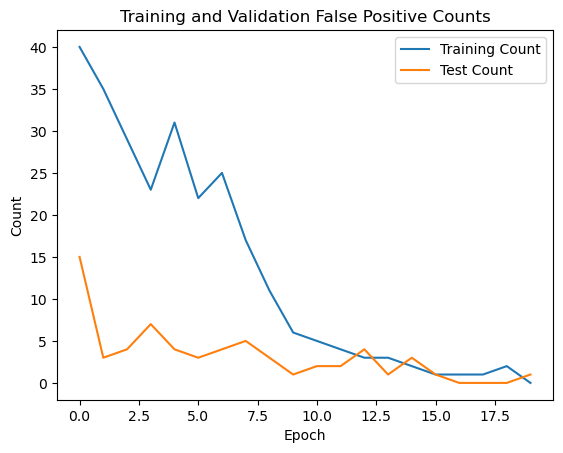

In [23]:
# Plot the false positive rates
plt.plot(history.history['false_positives'], label='Training Count')
plt.plot(history.history['val_false_positives'], label='Test Count')
plt.title('Training and Validation False Positive Counts')
plt.xlabel('Epoch')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

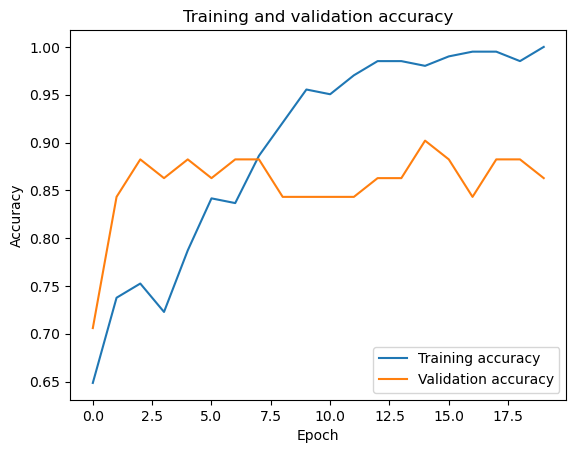

In [24]:
# plot the accuracy values
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

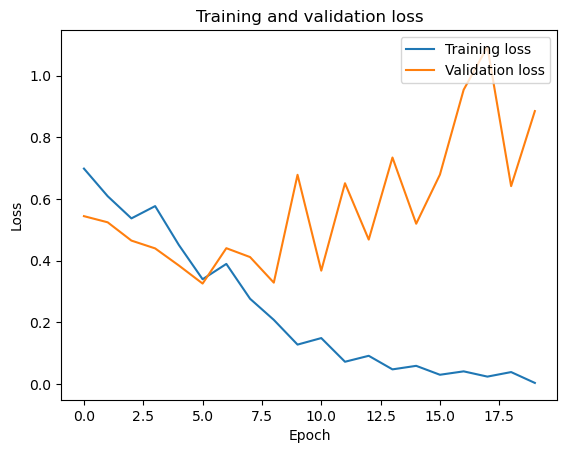

In [25]:
# plot the loss values
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()